# KNN

# Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Creación de Datos Sintéticos

En esta sección generamos datos sintéticos para simular un conjunto de datos sobre créditos y cumplimiento de pago. Utilizamos la librería **numpy** para generar números aleatorios y la librería **pandas** para organizar los datos en un DataFrame.

- `tam`: Variable que indica el tamaño del conjunto de datos.
- `np.random.seed(0)`: Establece la semilla aleatoria para reproducibilidad.
- `edades`: Genera aleatoriamente edades entre 18 y 60 años.
- `credito`: Genera aleatoriamente montos de crédito entre 3000 y 1,000,000.
- `cumplio`: Genera aleatoriamente valores binarios (0 o 1) que representan si se cumplió o no con el pago del crédito.

Finalmente, creamos un DataFrame (`df`) que contiene tres columnas: "Edad", "Credito" y "Cumplio", con los datos generados.

# Visualización de los Primeros Registros

Para tener una vista previa de los datos generados, mostramos los primeros registros del DataFrame utilizando el método `head()` de pandas y lo imprimimos en la consola.

```python
print(df.head())


In [2]:
tam = 200
np.random.seed(0)
edades = np.random.randint(18, 61, size=tam)
credito = np.random.randint(3000, 1000001, size=tam)
cumplio = np.random.randint(0, 2, size=tam)
df = pd.DataFrame({
    'Edad': edades,
    'Credito': credito,
    'Cumplio': cumplio
})

print(df.head())

   Edad  Credito  Cumplio
0    18   136847        1
1    21   742883        1
2    21   558040        0
3    57   878531        0
4    27   213536        1


# Normalización de Datos

En esta sección, normalizamos las características del conjunto de datos utilizando la técnica de escala mín-máx. Esto es útil para garantizar que todas las características estén en la misma escala y tengan un rango comparable, lo que puede mejorar el rendimiento de algunos modelos de aprendizaje automático.

- `norm`: Instancia de `MinMaxScaler` utilizada para la normalización.
- `caracteristicasNormalizacion`: Lista de características a normalizar, que en este caso incluyen 'Edad' y 'Credito'.
- `normalizacion`: Aplicamos la normalización a las características seleccionadas utilizando el método `fit_transform` de `MinMaxScaler`.
- `normDf`: Creamos un nuevo DataFrame (`normDf`) con las características normalizadas y conservamos la columna 'Cumplio' del DataFrame original (`df`).

# División de Datos en Conjuntos de Entrenamiento y Prueba

Después de la normalización, dividimos el conjunto de datos en dos partes: entrenamiento y prueba. Esto es esencial para evaluar el rendimiento del modelo en datos no vistos.

- `caracteristicas`: Seleccionamos las características normalizadas ('Edad' y 'Credito') como variables independientes.
- `clase`: Seleccionamos la variable objetivo, que en este caso es 'Cumplio'.
- `caracteristicas_entrenamiento`, `caracteristicas_prueba`, `clase_entrenamiento`, `clase_prueba`: Utilizamos la función `train_test_split` para dividir las características y la clase en conjuntos de entrenamiento y prueba, con una proporción de 70% para entrenamiento y 30% para prueba. Además, establecemos una semilla aleatoria (`random_state`) para reproducibilidad.

```python
caracteristicas_entrenamiento, caracteristicas_prueba, clase_entrenamiento, clase_prueba = train_test_split(
    caracteristicas, clase, test_size=0.3, random_state=42)


In [3]:
norm = MinMaxScaler()
caracteristicasNormalizacion = ['Edad', 'Credito']
normalizacion = norm.fit_transform(df[caracteristicasNormalizacion])
normDf = pd.DataFrame(normalizacion, columns=caracteristicasNormalizacion)
normDf['Cumplio'] = df['Cumplio'] 

caracteristicas = normDf[['Edad', 'Credito']]
clase = normDf['Cumplio']
caracteristicas_entrenamiento, caracteristicas_prueba, clase_entrenamiento, clase_prueba = train_test_split(
    caracteristicas, clase, test_size=0.3, random_state=42)

# Modelo KNN (k-Nearest Neighbors)

En esta sección, creamos y ajustamos un modelo de clasificación utilizando el algoritmo k-Nearest Neighbors (KNN). Este es un algoritmo de aprendizaje supervisado utilizado para problemas de clasificación y regresión.

- `clasificador`: Instanciamos un clasificador KNN con un hiperparámetro `n_neighbors=3`, lo que significa que consideraremos los tres vecinos más cercanos para realizar una predicción.
- Utilizamos el método `fit` del clasificador para ajustar el modelo a los datos de entrenamiento.

```python
clasificador = KNeighborsClassifier(n_neighbors=3)
clasificador.fit(caracteristicas_entrenamiento, clase_entrenamiento)

In [4]:
clasificador = KNeighborsClassifier(n_neighbors=3)
clasificador.fit(caracteristicas_entrenamiento, clase_entrenamiento)

KNeighborsClassifier(n_neighbors=3)

# Nuevo Solicitante y Evaluación del Modelo

En esta sección, evaluamos el modelo KNN entrenado anteriormente utilizando un nuevo solicitante y visualizamos la clasificación resultante junto con los datos existentes.

## Nuevo Solicitante

- Creamos un DataFrame (`nuevo_solicitante_df`) con la información del nuevo solicitante, incluyendo su edad y monto del crédito.
- Escalamos las características del nuevo solicitante utilizando el mismo escalador (`norm`) que utilizamos previamente para normalizar los datos de entrenamiento.
- Realizamos una predicción sobre la clase del nuevo solicitante utilizando el modelo KNN entrenado (`clasificador`).


Clase predicha: [1]
Probabilidades por clase: [[0.33333333 0.66666667]]


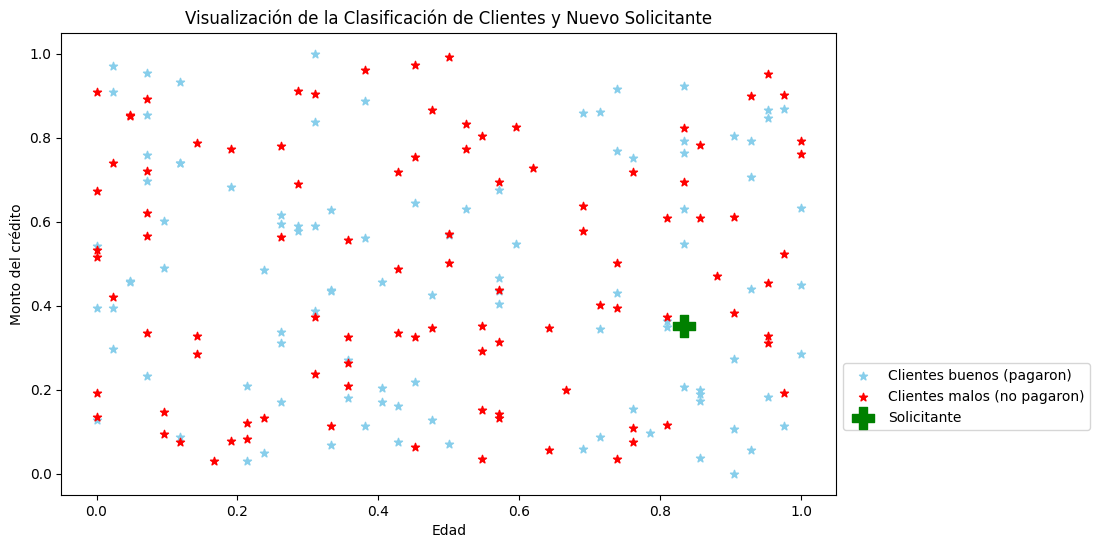

In [5]:
# Nuevo solicitante
edad = 53
monto = 350000
nuevo_solicitante_df = pd.DataFrame([[edad, monto]], columns=['Edad', 'Credito'])

# Escalar el nuevo solicitante
solicitante_escalado = norm.transform(nuevo_solicitante_df)
solicitante_escalado_df = pd.DataFrame(solicitante_escalado, columns=['Edad', 'Credito'])

# Predicción del modelo
clase_predicha = clasificador.predict(solicitante_escalado_df)
probabilidades = clasificador.predict_proba(solicitante_escalado_df)
print("Clase predicha:", clase_predicha)
print("Probabilidades por clase:", probabilidades)

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(normDf[normDf['Cumplio'] == 1]['Edad'], normDf[normDf['Cumplio'] == 1]['Credito'], color='skyblue', marker='*', label='Clientes buenos (pagaron)')
plt.scatter(normDf[normDf['Cumplio'] == 0]['Edad'], normDf[normDf['Cumplio'] == 0]['Credito'], color='red', marker='*', label='Clientes malos (no pagaron)')
plt.scatter(solicitante_escalado_df['Edad'], solicitante_escalado_df['Credito'], color='green', marker='P', s=250, label='Solicitante')
plt.xlabel('Edad')
plt.ylabel('Monto del crédito')
plt.title('Visualización de la Clasificación de Clientes y Nuevo Solicitante')
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

# Visualización de Regiones de Clasificación

En esta sección, visualizamos las regiones de clasificación resultantes del modelo KNN utilizando un mapa de contornos. Esto nos permite ver cómo el modelo divide el espacio de características para clasificar a los clientes como pagadores o deudores.

- Creamos una malla de puntos para el fondo del gráfico, definiendo los límites y el tamaño de paso (`h`) para la malla.
- Utilizamos el modelo KNN entrenado (`clasificador`) para predecir la clase para cada punto en la malla.
- Dibujamos el mapa de contornos utilizando `plt.contourf` para representar las regiones de clasificación.
- Superponemos los puntos de entrenamiento en el gráfico para visualizar la distribución de los datos.
- También mostramos la ubicación del nuevo solicitante en el gráfico.

/home/erik/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


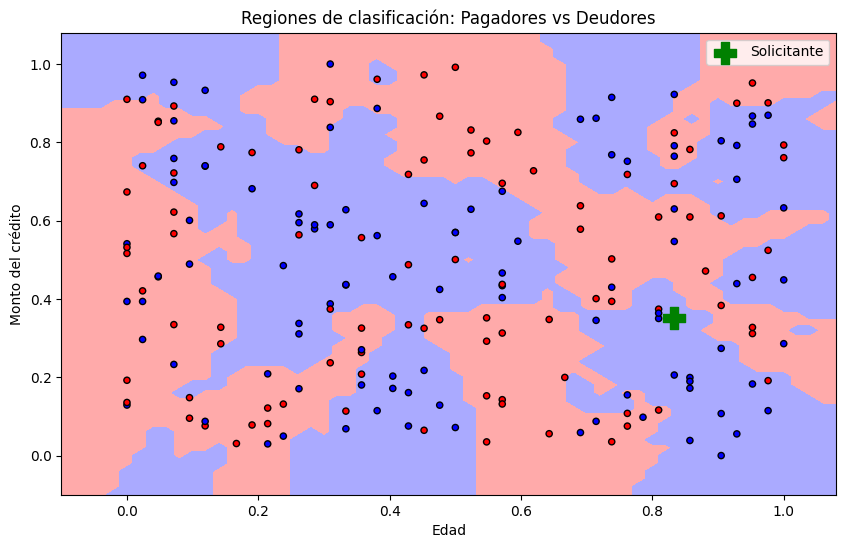

In [6]:
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ['red', 'blue']

# Crear una malla de puntos para el fondo
h = .02  # Tamaño de paso de la malla
x_min, x_max = normDf['Edad'].min() - 0.1, normDf['Edad'].max() + 0.1
y_min, y_max = normDf['Credito'].min() - 0.1, normDf['Credito'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir la clase para cada punto en la malla
Z = clasificador.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar el mapa de contornos
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Dibujar los puntos de entrenamiento
plt.scatter(normDf['Edad'], normDf['Credito'], c=normDf['Cumplio'], cmap=ListedColormap(cmap_bold), edgecolor='k', s=20)
plt.scatter(solicitante_escalado_df['Edad'], solicitante_escalado_df['Credito'], color='green', marker='P', s=250, label='Solicitante')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Edad')
plt.ylabel('Monto del crédito')
plt.title('Regiones de clasificación: Pagadores vs Deudores')
plt.legend(loc='upper right')
plt.show()
